In [1]:
from optosim.simulation.optical_photon_display import OpticalPhotonDisplay
from optosim.settings import CONFIG_DIR

import matplotlib.pyplot as plt
from IPython.display import clear_output

### Event display for individual photons

Event number: 156
x = [1.5 0.  0.1] t = [ 0.13802696 -0.5971214   0.79018643] medium = 0
x = [ 1.69214409 -0.8312387   1.2       ] t = [ 0.03943627 -0.17060611  0.98454981] medium = 3
Event number: 157
x = [1.5 0.  0.1] t = [-0.14062023 -0.12432728 -0.98222639] medium = 0
x = [ 1.48568352 -0.0126577   0.        ] t = [-0.08574404 -0.07580931 -0.99342886] medium = 1
x = [ 0.90739847 -0.52393981 -6.7       ] t = [-0.04017721 -0.03552208 -0.99856095] medium = 3
Event number: 158
x = [1.5 0.  0.1] t = [-0.17370193  0.24058317  0.95495936] medium = 0
x = [1.29991596 0.2771233  1.2       ] t = [-0.04962912  0.06873805  0.99639953] medium = 3
Event number: 159
x = [1.5 0.  0.1] t = [ 0.78261464 -0.59691965  0.17663876] medium = 0
x = [ 2.99108337 -1.13728637  0.43654254] t = [ 0.78261464 -0.59691965  0.17663876] medium = 4
Event number: 160
x = [1.5 0.  0.1] t = [-0.48301978 -0.65706808 -0.57875161] medium = 0
x = [ 1.41654109 -0.11353197  0.        ] t = [-0.29452425 -0.40065127 -0.86760246]

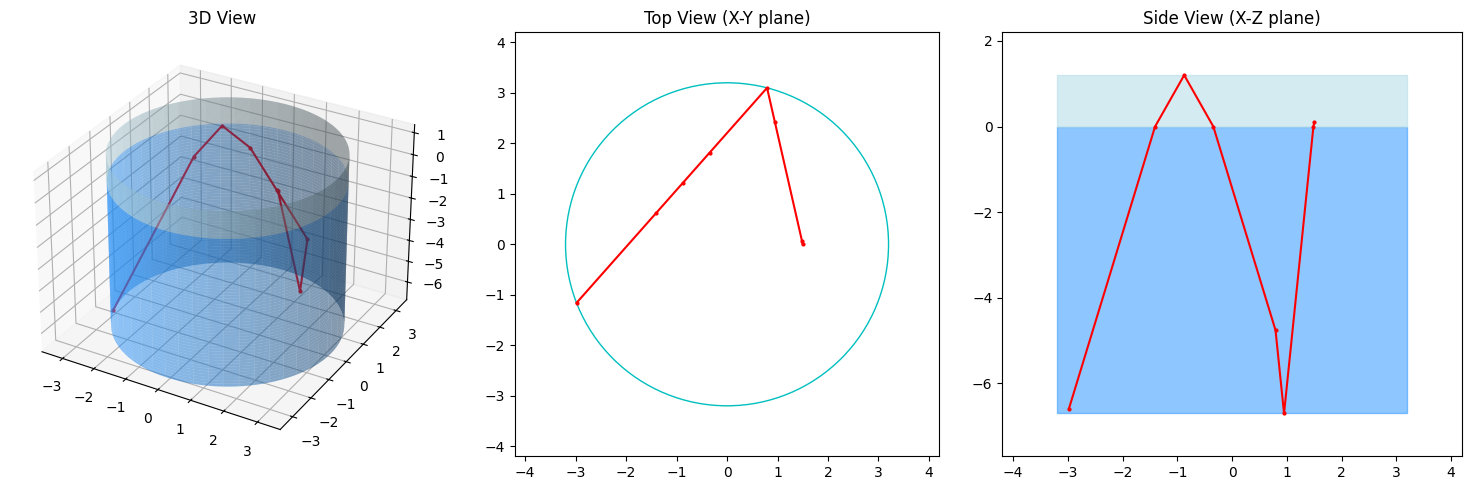

Quit the event display......


In [2]:
# Initialize the display class

config_file = CONFIG_DIR + '/config_nev10k_nph1k-25k.json'

photon = OpticalPhotonDisplay(config=config_file)

# switch scattering on/off
photon.set_no_scattering(False)
# switch modeling on/off
photon.set_experimental_scatter_model(True)

iselect = -1

# set random seed
for i in range(10000):
    print('Event number:',i)
    photon.set_random_seed(12345+i)

    #
    # generate a photon
    #
    photon.generate_photon([1.5, 0, 0.1])  # Generate a photon at the center of the detector
    #
    # propogate the photon through the detetor
    #
    photon.propagate()

    
    if (iselect == -1) or (i == iselect):
        #
        # show the event
        #
        
        if photon.get_number_of_reflections() > 5:
            # photon.plot_3d_view_animation()
        
            photon.plot()

            response = input("Press Enter to continue to the next event or 'q' to quit...")
            if (response.lower() == 'q') or (iselect != -1):
                print("Quit the event display......")
                break
    
            clear_output(wait=True)
